## Loading Dataset

We will use The 20 Newsgroups dataset 
Dataset [homepage](http://qwone.com/~jason/20Newsgroups/): 

Scikit-learn includes some nice helper functions for retrieving the 20 Newsgroups dataset-- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html. We'll use them below to retrieve the dataset.

Also look at results fron non- neural net models here : https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py



In [ ]:
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(subset='train',
                           remove=('headers', 'footers', 'quotes'))

test = fetch_20newsgroups(subset='test',
                           remove=('headers', 'footers', 'quotes'))

In [ ]:
from pathlib import Path
folder=Path('/content/gdrive/My Drive/Teaching/NLP/12_Code_advanced_methods')

In [ ]:
print(train.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [ ]:
print(train.target[0])

7


In [ ]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
len(train.target_names)

20

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


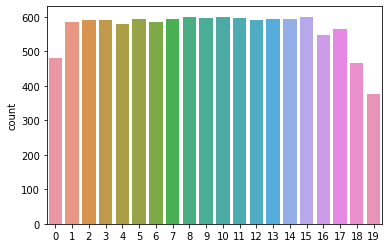

In [ ]:
import seaborn as sns

# Plot the number of tokens of each length.
sns.countplot(train.target);

In [ ]:
import pandas as pd
df = pd.DataFrame(columns = ['text','label'])
df['text'] = train.data
df['label'] = train.target

In [ ]:
df.label.value_counts()

10    600
15    599
8     598
9     597
11    595
13    594
7     594
14    593
5     593
12    591
2     591
3     590
6     585
1     584
4     578
17    564
16    546
0     480
18    465
19    377
Name: label, dtype: int64

In [ ]:
!pip install transformers


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
#import warnings
#warnings.filterwarnings('ignore')

## Bert model

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 
device

device(type='cuda', index=0)

In [ ]:
df["text"]

0        I was wondering if anyone out there could enli...
1        A fair number of brave souls who upgraded thei...
2        well folks, my mac plus finally gave up the gh...
3        \nDo you have Weitek's address/phone number?  ...
4        From article <C5owCB.n3p@world.std.com>, by to...
                               ...                        
11309    DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
11310    I have a (very old) Mac 512k and a Mac Plus, b...
11311    I just installed a DX2-66 CPU in a clone mothe...
11312    \nWouldn't this require a hyper-sphere.  In 3-...
11313    Stolen from Pasadena between 4:30 and 6:30 pm ...
Name: text, Length: 11314, dtype: object

In [ ]:
df['label']

0         7
1         4
2         4
3         1
4        14
         ..
11309    13
11310     4
11311     3
11312     1
11313     8
Name: label, Length: 11314, dtype: int64

In [ ]:
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

Model #1: Preparing the Dataset
Before we can hand our sentences to BERT, we need to so some minimal processing to put them in the format it requires.

Tokenization
Our first step is to tokenize the sentences -- break them up into word and subwords in the format BERT is comfortable with.

## Truncating sequence length to 512

In [ ]:
tokenized = df.text.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,max_length=512,truncation= True )))

## Padding
After tokenization, tokenized is a list of sentences -- each sentences is represented as a list of tokens. We want BERT to process our examples all at once (as one batch). It's just faster that way. For that reason, we need to pad all lists to the same size, so we can represent the input as one 2-d array, rather than a list of lists (of different lengths).

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(11314, 512)

## Masking
If we directly send padded to BERT, that would slightly confuse it. We need to create another variable to tell it to ignore (mask) the padding we've added when it's processing its input. That's what attention_mask is:

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(11314, 512)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

In [ ]:
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_mask, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=16, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([16, 512])
torch.Size([16, 512])
torch.Size([16])


In [ ]:
model.config.to_dict()['hidden_size']

768

In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
labels.shape

(11314,)

## Model train test Split

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6545668827342369


We now train the LogisticRegression model. If you've chosen to do the gridsearch, you can plug the value of C into the model declaration (e.g. LogisticRegression(C=5.2))

In [ ]:
grid_search.score(test_features, test_labels)

0.6620714033227288

# truncate sequence length to 128

In [ ]:
tokenized = df.text.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,max_length=128,truncation= True )))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(11314, 128)

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(11314, 128)

In [ ]:
input_ids = torch.tensor(padded) 
attention_mask = torch.tensor(attention_mask)
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_mask, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=18, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([18, 128])
torch.Size([18, 128])
torch.Size([18])


In [ ]:
model.config.to_dict()['hidden_size']

768

In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)  

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
labels.shape

(11314,)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6358279316440777


In [ ]:
grid_search.score(test_features, test_labels)

0.630965005302227

# Truncate Sequence Length to 140 tokens

In [ ]:
tokenized = df.text.apply((lambda x: tokenizer.encode(x, add_special_tokens=True,max_length=140,truncation= True )))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(11314, 140)

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(11314, 140)

In [ ]:
input_ids = torch.tensor(padded) 
attention_mask = torch.tensor(attention_mask)
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_mask, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=18, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([18, 140])
torch.Size([18, 140])
torch.Size([18])


In [ ]:
model.config.to_dict()['hidden_size']

768

In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0) 

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6288744843842073


In [ ]:
grid_search.score(test_features, test_labels)

0.6376811594202898

# B)

#Truncate Head with max token equals 512

## to know the maximum length of sentence

In [ ]:
max_len = 0

# For every sentence...
for sent in df.text:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (604 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  52886


In [ ]:

# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=512

# For every sentence...
for sent in df.text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=False,
                        padding=False,
                        #max_length = maxlen,           # Pad & truncate all sentences.
                        return_attention_mask = True,   # Construct attn. masks.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])

    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

    # Get the decoded sentence
    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
#print(input_ids)
attention_masks = torch.cat(attention_masks, dim=0)

In [ ]:
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=16, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([16, 512])
torch.Size([16, 512])
torch.Size([16])


In [ ]:
model.config.to_dict()['hidden_size']

768

In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)   

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
labels.shape

(11314,)

## Model train test Split

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6519740718915734


In [ ]:
grid_search.score(test_features, test_labels)

0.6546482856132909

# Truncate Head with max token equal 128

In [ ]:
# Get last three tokens and truncate head
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=128

# For every sentence...
for sent in df.text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=False,
                        padding=False,
                        #max_length = maxlen,           # Pad & truncate all sentences.
                        return_attention_mask = True,   # Construct attn. masks.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])

    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

    # Get the decoded sentence
    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
#print(input_ids)
attention_masks = torch.cat(attention_masks, dim=0)

In [ ]:
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=16, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16])


In [ ]:
model.config.to_dict()['hidden_size']

768

In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0) 

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
labels.shape

(11314,)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6087212728344136


In [ ]:
grid_search.score(test_features, test_labels)

0.616825733474726

# Truncate tokens with max_length =140

---



In [ ]:
# Get last three tokens and truncate head
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=140

# For every sentence...
for sent in df.text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=False,
                        padding=False,
                        #max_length = maxlen,           # Pad & truncate all sentences.
                        return_attention_mask = True,   # Construct attn. masks.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])

    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

    # Get the decoded sentence
    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
#print(input_ids)
attention_masks = torch.cat(attention_masks, dim=0)

In [ ]:
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=16, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([16, 140])
torch.Size([16, 140])
torch.Size([16])


In [ ]:
model.config.to_dict()['hidden_size']

768

In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)  

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
labels.shape

(11314,)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
parameters = {'C': [0.001,0.01,0.1,1]}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6174425456688274


In [ ]:
grid_search.score(test_features, test_labels)

0.6362672322375398

# Truncate middle tokens in the beginining with max_length =512

In [ ]:

# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=512

# For every sentence...
for sent in df.text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=False,
                        padding=False,
                        #max_length = maxlen,           # Pad & truncate all sentences.
                        return_attention_mask = True,   # Construct attn. masks.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[1:(maxlen//2)] + ids[-(maxlen//2):-1]  + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])

    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

    # Get the decoded sentence
    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
#print(input_ids)
attention_masks = torch.cat(attention_masks, dim=0)

In [ ]:
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=16, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([16, 512])
torch.Size([16, 512])
torch.Size([16])


In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0) 

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
labels.shape

(11314,)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6591632292280496


In [ ]:
grid_search.score(test_features, test_labels)

0.6595970307529162

## Truncate middle tokens in the beginining with max_length **128**

In [ ]:

# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []
docoder_sent=[]
before_trunc=[]
maxlen=128

# For every sentence...
for sent in df.text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=False,
                        padding=False,
                        #max_length = maxlen,           # Pad & truncate all sentences.
                        return_attention_mask = True,   # Construct attn. masks.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[1:(maxlen//2)] + ids[-(maxlen//2):-1]  + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])

    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

    # Get the decoded sentence
    docoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
#print(input_ids)
attention_masks = torch.cat(attention_masks, dim=0)

In [ ]:
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=16, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([16, 128])
torch.Size([16, 128])
torch.Size([16])


In [ ]:
model.config.to_dict()['hidden_size']

768

In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0) 

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
labels.shape

(11314,)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.6278137890394814


In [ ]:
grid_search.score(test_features, test_labels)

0.6405090137857901

# Truncate middle tokens in the beginining with max_length 140

In [ ]:

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
decoder_sent=[]
before_trunc=[]
maxlen=140

# For every sentence...
for sent in df.text:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        truncation=False,
                        padding=False,
                        #max_length = maxlen,           # Pad & truncate all sentences.
                        return_attention_mask = True,   # Construct attn. masks.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
   
    before_trunc.append(encoded_dict['input_ids'])

    ids = encoded_dict['input_ids']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[1:(maxlen//2)] + ids[-(maxlen//2):-1]  + [102]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['input_ids']=torch.tensor([ids])

    ids = encoded_dict['attention_mask']
    if len(ids)>=maxlen:
      ids = [ids[0]] + ids[-(maxlen-1):-1] + [1]
    else:
      ids = ids + ([0] * (maxlen-len(ids)))
    encoded_dict['attention_mask']=torch.tensor([ids])

    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    #print(input_ids)
        
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

    # Get the decoded sentence
    decoder_sent.append(tokenizer.decode(encoded_dict['input_ids'].squeeze()))

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
#print(input_ids)
attention_masks = torch.cat(attention_masks, dim=0)

In [ ]:
labels=torch.tensor(df['label'].values)

In [ ]:
from torch.utils.data import TensorDataset, random_split
dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
data_loader= torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=16,
                                        shuffle=False,
                                        num_workers=4)

In [ ]:
tmp_loader = torch.utils.data.DataLoader(dataset=dataset, 
                                           batch_size=16, 
                                           shuffle=True)
for x, y,z in tmp_loader:
  print(x.shape)
  print(y.shape)
  print(z.shape)
  break

torch.Size([16, 140])
torch.Size([16, 140])
torch.Size([16])


In [ ]:
model.config.to_dict()['hidden_size']

768

In [ ]:
 #last_hidden_states_all= torch.empty(256,768)
 for i, (input_ids,attention_mask, labels) in enumerate(data_loader):
   input_ids=input_ids.to(device)
   attention_mask=attention_mask.to(device)
   labels=labels.to(device)
   with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)[0][:,0,:]
      
    if i==0:
        last_hidden_states_all = last_hidden_states
        labels_all= labels
        #print(last_hidden_states.size())
    else:
        last_hidden_states_all=torch.cat((last_hidden_states_all,last_hidden_states),axis=0)
        labels_all=torch.cat((labels_all,labels),axis=0)

In [ ]:
print(last_hidden_states_all.shape)
print(labels_all.shape)

torch.Size([11314, 768])
torch.Size([11314])


In [ ]:
features = last_hidden_states_all.cpu().numpy()

In [ ]:
features.shape

(11314, 768)

In [ ]:
labels = labels_all.cpu().numpy()

In [ ]:
labels.shape

(11314,)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
 parameters = {'C': [0.001,0.01,0.1,1]}
 grid_search = GridSearchCV(LogisticRegression(max_iter=10000), parameters)
 grid_search.fit(train_features, train_labels)

 print('best parameters: ', grid_search.best_params_)
 print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.1}
best scrores:  0.643134944018857


In [ ]:
grid_search.score(test_features, test_labels)

0.633085896076352